In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,plot_confusion_matrix,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [5]:
train = pd.read_csv('C:/Users/mncedisi.mncwabe/Videos/Data_Train.csv',encoding='cp1252')
test = pd.read_csv('C:/Users/mncedisi.mncwabe/Videos/Data_Test.csv',encoding='cp1252')

In [6]:
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [7]:
test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [8]:
train.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [9]:
test.isnull().sum()

STORY    0
dtype: int64

In [10]:
train.shape

(7628, 2)

In [11]:
test.shape

(2748, 1)

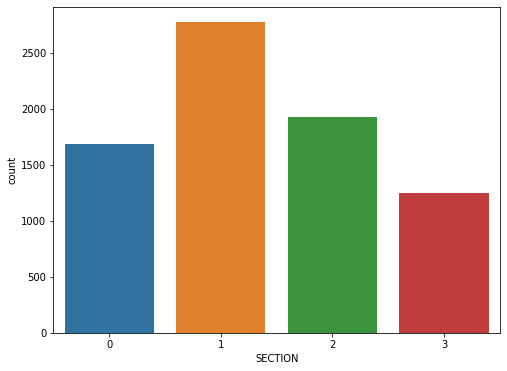

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='SECTION',data=train);

In [16]:
# most of the news in the dataset fall into Technology(1) and Entertainment(2)

In [17]:
X = train['STORY']
y = train['SECTION']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=10)

In [19]:
# implement transform methods and fit on training test

text = Pipeline([('tfidf',TfidfVectorizer()),('classify',LinearSVC())])
text.fit(X_train,y_train)
text.score(X_test,y_test)*100

96.85452162516383

In [34]:
# implement transform methods and fit on training test

rf = Pipeline([('tfidf',TfidfVectorizer()),('classify',RandomForestClassifier())])
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

93.05373525557012

In [35]:
# implement transform methods and fit on training test

xg = Pipeline([('tfidf',TfidfVectorizer()),('classify',XGBClassifier())])
xg.fit(X_train,y_train)
xg.score(X_test,y_test)*100

94.88859764089122

In [20]:
y_pred = text.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       543
           1       0.98      0.97      0.97       869
           2       0.96      0.98      0.97       531
           3       0.96      0.98      0.97       346

    accuracy                           0.97      2289
   macro avg       0.97      0.97      0.97      2289
weighted avg       0.97      0.97      0.97      2289



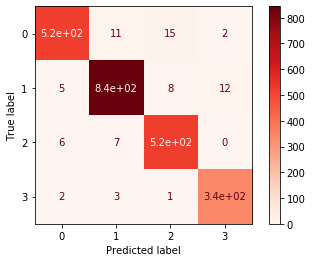

In [22]:
plot_confusion_matrix(text,X_test,y_test,cmap=plt.cm.Reds);

In [29]:
newdata = test['STORY']
tweetid = test.set_index('STORY')
tweet_index = tweetid.index

In [36]:
pred = text.predict(newdata)

In [31]:
table = {'tweetid':tweet_index,'SECTION':np.round(pred,0)}
submission = pd.DataFrame(table)
final_subm = submission[['tweetid','SECTION']]

In [38]:
final_subm.to_csv('News_Category.csv')